# Ecommerce Data Analysis

In [2]:
# Impor libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np


In [3]:
# Connecting to mysql database
db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "root1234",
                             database = "ecom")
cur = db.cursor() 


```python
# Template for running queries
query = """ """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()
```

MySQL:
```sql
create database ecom;
use ecom;
```

## Basic Queries

### 1. List all unique cities where customers are located.

```sql
select distinct customer_city from customers;
```

### Logic Behind the Question:
You want to identify all the **unique cities** where customers are located. This helps in understanding the geographic distribution of your customer base without duplicates.

---

### Query Explanation:
- **`SELECT DISTINCT customer_city`**: Fetches unique values from the `customer_city` column.
- **`FROM customers`**: Specifies the `customers` table as the data source.

---

The query ensures that each city appears only once in the result, even if multiple customers are from the same city.

In [4]:
query = """ select distinct customer_city from customers; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


In [5]:
df.shape


(4119, 1)

### 2. Count the number of orders placed in 2017.

```sql
select count(order_id) from orders where year(order_purchase_timestamp) = 2017;
```
### Logic Behind the Question:
You want to determine how many orders were placed in the year 2017. This helps in analyzing order trends or performance for that specific year.

---

### Query Explanation:
- **`COUNT(order_id)`**: Counts the number of non-NULL `order_id` values, representing the total number of orders.
- **`FROM orders`**: Specifies the `orders` table as the source of data.
- **`WHERE year(order_purchase_timestamp) = 2017`**: Filters rows to include only those where the `order_purchase_timestamp` falls in the year 2017.

---

The query returns the total number of orders made during that year.

In [6]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017; """

cur.execute(query)

data = cur.fetchall()

print(f"Total orders placed in 2027 are {data[0][0]}.")


Total orders placed in 2027 are 45101.


### 3. Find the total sales per category.

```sql
select upper(products.product_category) category,
round(sum(payments.payment_value),2) as sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
```
### Logic Behind the Question:
You want to calculate the **total sales** for each product category and display the results with the category names. This helps analyze revenue distribution across product categories.

---

### Query Explanation:
1. **`SELECT upper(products.product_category) category`**:
   - Converts product category names to uppercase for consistent formatting and names the column `category`.

2. **`ROUND(SUM(payments.payment_value), 2) AS sales`**:
   - Sums up the `payment_value` (total sales) for each category and rounds it to 2 decimal places, naming the result `sales`.

3. **`FROM products JOIN order_items ON products.product_id = order_items.product_id`**:
   - Joins the `products` table with `order_items` using the `product_id` to associate products with order items.

4. **`JOIN payments ON payments.order_id = order_items.order_id`**:
   - Joins the `payments` table with `order_items` using the `order_id` to link payment values to corresponding orders.

5. **`GROUP BY category`**:
   - Groups the results by `category`, ensuring the `SUM` is calculated separately for each product category.

---

This query gives the total sales for each product category, formatted nicely and grouped.

In [7]:
query = """ 
select upper(products.product_category) category,
round(sum(payments.payment_value),2) as sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category;
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["Category", "Sales"])
df


,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


### 4. Calculate the percentage of orders that were paid in installments.

```sql
select ((sum(case when payment_installments >= 1 then 1 else 0 end))/count(*))*100 from payments;
```

### Logic Behind the Question:
You want to calculate the **percentage of orders** where customers opted for installments in their payments. This helps understand customer payment behavior, particularly the use of installment plans.

---

### Query Explanation:
1. **`SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END)`**:
   - This `CASE` statement counts rows where `payment_installments` is 1 or more (indicating installments were used). For each matching row, it adds `1` to the sum.

2. **`COUNT(*)`**:
   - Counts all rows in the `payments` table, representing the total number of payments.

3. **`(SUM(...) / COUNT(*)) * 100`**:
   - Divides the count of payments with installments by the total number of payments.
   - Multiplies the result by 100 to convert it to a percentage.

---

### Purpose:
This query calculates the proportion of payments made with installments as a percentage of the total payments. It provides insight into how frequently customers choose installment options.

In [8]:
query = """ select ((sum(case when payment_installments >= 1 then 1
else 0 end))/count(*))*100 from payments; """

cur.execute(query)

data = cur.fetchall()

print(f"The percentage of orders that were paid in intallments is {data[0][0]}")



The percentage of orders that were paid in intallments is 99.9981


### 5. Count the number of customers from each state.

```sql
select customer_state, count(customer_id) from customers group by customer_state;
```
### Logic Behind the Question:
You want to find out how many customers are located in each state. This helps in understanding the customer distribution across different states.

---

### Query Explanation:
1. **`SELECT customer_state`**:
   - Retrieves the state (`customer_state`) where each customer resides.

2. **`COUNT(customer_id)`**:
   - Counts the number of customers (`customer_id`) for each state.

3. **`FROM customers`**:
   - Specifies the `customers` table as the source of data.

4. **`GROUP BY customer_state`**:
   - Groups the rows by `customer_state` so that the `COUNT` is calculated separately for each state.

---

### Purpose:
This query provides a list of states along with the number of customers in each, showing the distribution of customers by state.

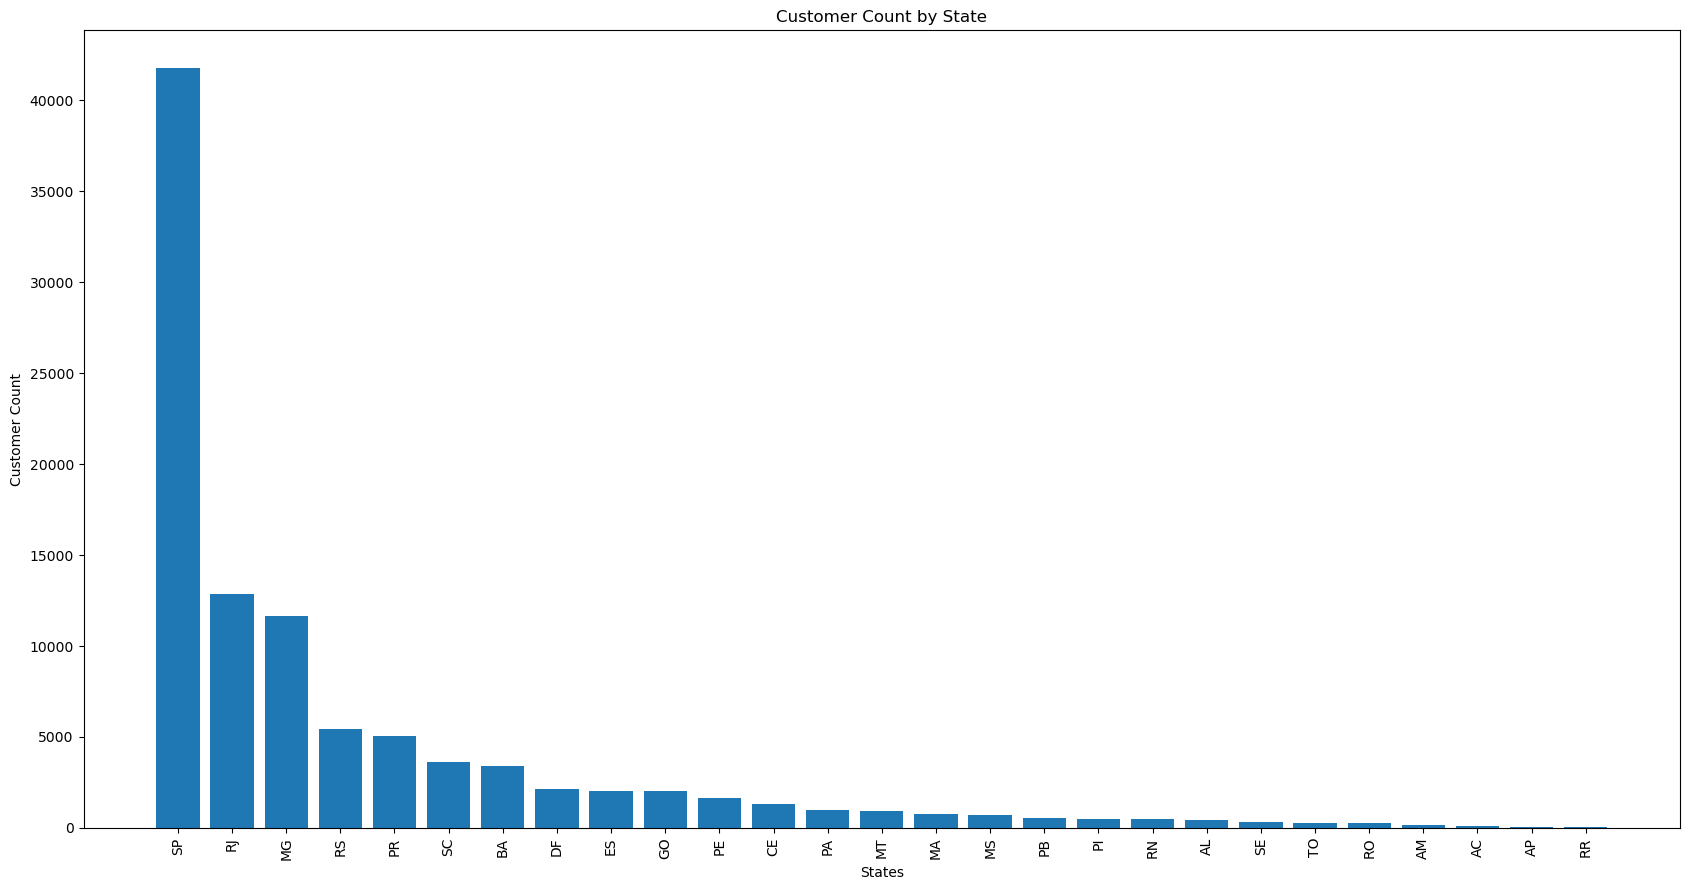

In [9]:
query = """ select customer_state, count(customer_id) from customers group by customer_state; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["state", "customer_count"])
# df.head()
df = df.sort_values(by="customer_count", ascending=False)

plt.figure(figsize=(17, 9))
plt.bar(df['state'], df['customer_count'])
plt.title('Customer Count by State')
plt.xlabel('States')
plt.ylabel('Customer Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Intermediate Queries

### 1. Calculate the number of orders per month in 2018.

```sql
select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months;
```
### Logic Behind the Question:
You want to find out how many orders were placed in each month of the year 2018. This helps in analyzing monthly trends in order volume for that specific year.

---

### Query Explanation:
1. **`SELECT monthname(order_purchase_timestamp) months`**:
   - Extracts the month name (e.g., "January") from the `order_purchase_timestamp` column and labels it as `months`.

2. **`COUNT(order_id) order_count`**:
   - Counts the number of orders (`order_id`) placed in each month and labels the count as `order_count`.

3. **`FROM orders`**:
   - Specifies the `orders` table as the source of data.

4. **`WHERE year(order_purchase_timestamp) = 2018`**:
   - Filters the rows to include only orders placed in the year 2018.

5. **`GROUP BY months`**:
   - Groups the results by `months`, so the `COUNT` is calculated separately for each month.

---

### Purpose:
This query provides the number of orders placed in each month of 2018, helping to track order patterns across the year.

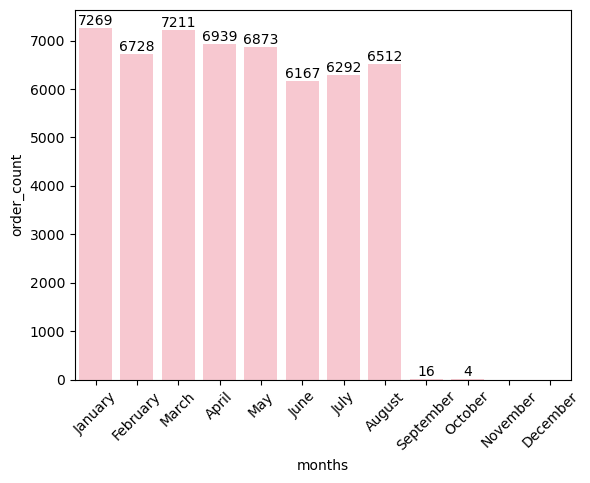

In [10]:
query = """
select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months;
"""
cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["months", "order_count"])
ord = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df

ax = sns.barplot(x = df['months'], y = df['order_count'], data=df, order=ord, color="pink")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()


### 2. Find the average number of products per order, grouped by customer city.

```sql
with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc;
```

### Logic Behind the Question:
You want to determine the **average number of products per order** for each customer city. This helps analyze purchasing patterns across cities to identify high or low-volume areas.

---

### Query Explanation:

1. **Common Table Expression (CTE): `count_per_order`**:
   - **Purpose**: Calculate the number of products in each order.
   ```sql
   select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
   from orders join order_items
   on orders.order_id = order_items.order_id
   group by orders.order_id, orders.customer_id
   ```
   - **`COUNT(order_items.order_id)`**: Counts how many products are in each order.
   - **`GROUP BY orders.order_id, orders.customer_id`**: Groups the results by `order_id` and `customer_id` to ensure each order is counted separately.

2. **Main Query**:
   ```sql
   select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
   from customers join count_per_order
   on customers.customer_id = count_per_order.customer_id
   group by customers.customer_city order by average_orders desc
   ```
   - **`JOIN customers` with `count_per_order`**: Links customer data with the order product counts using `customer_id`.
   - **`ROUND(AVG(count_per_order.oc), 2)`**: Calculates the average number of products per order for each city, rounded to 2 decimal places.
   - **`GROUP BY customers.customer_city`**: Groups the results by city to calculate averages for each city.
   - **`ORDER BY average_orders DESC`**: Sorts cities by their average order size in descending order.

---

### Purpose:
This query provides a ranked list of customer cities based on the **average number of products per order**, helping to identify cities with larger or smaller order volumes.

In [11]:
query = """ with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['customer_city', 'avg_prd/ord'])
df.head()


,customer_city,avg_prd/ord
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00


### 3. Calculate the percentage of total revenue contributed by each product category.

```sql
select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc;
```
### Logic Behind the Question:
You want to find out how much each product category contributes to the **total revenue** as a percentage. This helps understand which categories are the biggest revenue drivers.

---

### Query Explanation:

1. **Main Query**:
   ```sql
   select upper(products.product_category) category,
   round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
   ```
   - **`UPPER(products.product_category)`**: Converts product category names to uppercase and labels them as `category`.
   - **`SUM(payments.payment_value)`**: Sums up the revenue (`payment_value`) generated by each product category.
   - **`(SUM(payments.payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100`**:
     - Divides the revenue of a category by the total revenue from all payments.
     - Multiplies by 100 to express it as a percentage.
   - **`ROUND(..., 2)`**: Rounds the percentage to 2 decimal places and labels it as `sales_percentage`.

2. **Joins**:
   - **`FROM products JOIN order_items ON products.product_id = order_items.product_id`**:
     - Links products to order items using `product_id` to associate categories with orders.
   - **`JOIN payments ON payments.order_id = order_items.order_id`**:
     - Links payments to orders using `order_id` to calculate revenue for each order.

3. **`GROUP BY category`**:
   - Groups the data by product category to calculate revenue percentages for each category.

4. **`ORDER BY sales_percentage DESC`**:
   - Sorts the categories in descending order of their revenue contributions.

---

### Purpose:
This query shows the **percentage contribution** of each product category to the total revenue, ranked from highest to lowest, helping to prioritize top-performing categories.

In [12]:
query = """
select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Category', 'Sales Percentage Distribution'])
df.head()


,Category,Sales Percentage Distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


### 4. Identify the correlation between product price and the number of times a product has been purchased.
```sql
select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;
```
### Logic Behind the Question:
You want to explore the relationship between the **price of a product** and how often it has been purchased. By aggregating purchases and average prices per product category, you can identify trends or correlations, such as whether higher-priced products sell less frequently.

---

### Query Explanation:

1. **`SELECT products.product_category`**:
   - Retrieves the product category name to group the data by product type.

2. **`COUNT(order_items.product_id)`**:
   - Counts how many times products within each category have been purchased. This reflects the total number of purchases for the category.

3. **`ROUND(AVG(order_items.price), 2)`**:
   - Calculates the average price of products within each category, rounded to 2 decimal places.

4. **`FROM products JOIN order_items ON products.product_id = order_items.product_id`**:
   - Joins the `products` table with the `order_items` table using `product_id` to link product details with purchase details.

5. **`GROUP BY products.product_category`**:
   - Groups the results by product category to calculate total purchases and average prices for each category separately.

---

### Purpose:
This query aggregates the total number of purchases and the average product price for each category. By comparing these results, you can infer trends, such as whether lower-priced products sell more frequently than higher-priced ones.

In [13]:
query = """
select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Category', 'Order_Count', 'Price'])
df.head()


,Category,Order_Count,Price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14


In [14]:
arr1 = df["Order_Count"]
arr2 = df["Price"]


In [15]:
a = np.corrcoef([arr1, arr2])
print(f"The correlation is {a[0][-1]}")


The correlation is -0.10631514167157562


### 5. Calculate the total revenue generated by each seller, and rank them by revenue.

```sql
select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a;
```
### Logic Behind the Question:
You want to calculate the **total revenue** generated by each seller and rank them based on their revenue. This helps identify the top-performing sellers in terms of revenue generation.

---

### Query Explanation:

1. **Subquery**:
   ```sql
   select order_items.seller_id, sum(payments.payment_value) revenue
   from order_items join payments
   on order_items.order_id = payments.order_id
   group by order_items.seller_id
   ```
   - **`SUM(payments.payment_value)`**: Calculates the total revenue generated by each seller by summing up the `payment_value` from the `payments` table.
   - **`GROUP BY order_items.seller_id`**: Groups the data by seller, ensuring each seller's revenue is calculated separately.

2. **Main Query**:
   ```sql
   select *, dense_rank() over(order by revenue desc) as rn from (...) as a;
   ```
   - **`DENSE_RANK() OVER (ORDER BY revenue DESC)`**: Assigns a rank to each seller based on their revenue, sorted in descending order (highest revenue first). The `DENSE_RANK()` function ensures that sellers with the same revenue receive the same rank without gaps.
   - **`SELECT *`**: Selects all columns from the subquery, including the computed rank `rn`.

---

### Purpose:
This query calculates the total revenue generated by each seller, ranks them in descending order of revenue, and assigns a rank number. This helps in identifying the highest-grossing sellers.

In [16]:
query = """ 
select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Seller_id", "Revenue", "Rank"])
df = df.head()


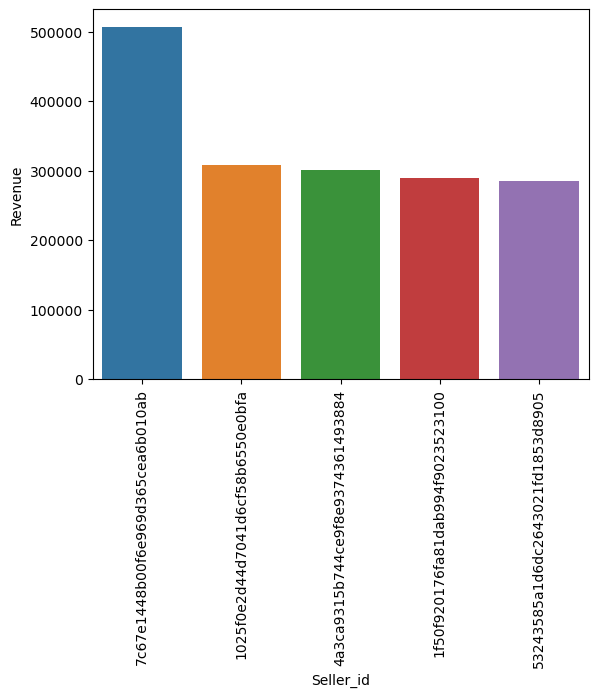

In [17]:
sns.barplot(x="Seller_id", y="Revenue", data=df)
plt.xticks(rotation=90)
plt.show()


## Advanced Queries

### 1. Calculate the moving average of order values for each customer over their order history.

```sql
select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a;
```
### Logic Behind the Question:
You want to calculate the **moving average** of order values for each customer over their order history. A moving average smooths out fluctuations by averaging the values over a defined range, providing insights into trends or patterns in a customer’s purchasing behavior.

---

### Query Explanation:

1. **Subquery**:
   ```sql
   select orders.customer_id, orders.order_purchase_timestamp,
   payments.payment_value as payment
   from payments join orders
   on payments.order_id = orders.order_id
   ```
   - **`orders.customer_id`**: Retrieves the customer ID for each order.
   - **`orders.order_purchase_timestamp`**: Fetches the timestamp of when the order was placed.
   - **`payments.payment_value AS payment`**: Gets the payment amount for each order from the `payments` table.

2. **Main Query**:
   ```sql
   select customer_id, order_purchase_timestamp, payment,
   avg(payment) over(partition by customer_id order by order_purchase_timestamp
   rows between 2 preceding and current row) as mov_avg
   ```
   - **`AVG(payment) OVER (...)`**: Calculates the moving average of the `payment` value for each customer’s orders. The average is calculated for the current row and the previous two rows (3 orders in total).
   - **`PARTITION BY customer_id`**: Ensures the moving average is calculated separately for each customer.
   - **`ORDER BY order_purchase_timestamp`**: Orders the rows by the order timestamp to calculate the moving average in chronological order.
   - **`ROWS BETWEEN 2 PRECEDING AND CURRENT ROW`**: Defines the window to include the current row and the two previous rows (total of 3 rows).

---

### Purpose:
This query calculates the **moving average** of order payments for each customer, considering the last three orders (including the current one). It helps in understanding the customer’s average spending behavior over time, smoothing out any short-term fluctuations.

In [18]:
query = """
select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df


,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


### 2. Calculate the cumulative sales per month for each year.

```sql
select years, months, payment, sum(payment)
over(order by years, months) cummulative_sales from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a;
```

### Logic Behind the Question:
You want to calculate the **cumulative sales per month** for each year. This means that for each month, you'll sum up the sales for that month and all preceding months of the year to understand the total revenue over time.

---

### Query Explanation:

1. **Subquery**:
   ```sql
   select year(orders.order_purchase_timestamp) as years,
   month(orders.order_purchase_timestamp) as months,
   round(sum(payments.payment_value), 2) as payment
   from orders join payments
   on orders.order_id = payments.order_id
   group by years, months
   order by years, months
   ```
   - **`year(orders.order_purchase_timestamp) AS years`**: Extracts the year from the `order_purchase_timestamp` to group sales by year.
   - **`month(orders.order_purchase_timestamp) AS months`**: Extracts the month from the `order_purchase_timestamp` to group sales by month within each year.
   - **`round(sum(payments.payment_value), 2) AS payment`**: Sums up the payment values for each month and rounds the result to two decimal places.
   - **`GROUP BY years, months`**: Groups the results by year and month to aggregate monthly sales.
   - **`ORDER BY years, months`**: Orders the results by year and month to ensure proper sequencing.

2. **Main Query**:
   ```sql
   select years, months, payment, sum(payment)
   over(order by years, months) cummulative_sales from (...)
   ```
   - **`SUM(payment) OVER (ORDER BY years, months)`**: Calculates the cumulative sum of sales up to the current month, ordered by year and month. It adds the sales of the current month to the sum of all previous months within the year.
   - **`cummulative_sales`**: Names the cumulative sum column.

---

### Purpose:
This query calculates **cumulative monthly sales** for each year, showing the running total of payments as you progress through the months. This helps track the overall growth of sales within a year, providing insights into how revenue accumulates over time.

In [19]:
query = """
select years, months, payment, sum(payment)
over(order by years, months) cummulative_sales from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data , columns=['Years', 'Months', 'Payment', 'Cummulative Sales'])
df


,Years,Months,Payment,Cummulative Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


### 3. Calculate the year-over-year growth rate of total sales.

```sql
with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a;
```

### Logic Behind the Question:
You want to calculate the **year-over-year growth rate** of total sales, which shows how the total sales in one year compare to the previous year. This is useful for measuring the performance and growth of sales over time.

---

### Query Explanation:

1. **Common Table Expression (CTE): `a`**:
   ```sql
   select year(orders.order_purchase_timestamp) as years,
   round(sum(payments.payment_value), 2) as payment
   from orders join payments
   on orders.order_id = payments.order_id
   group by years
   order by years
   ```
   - **`year(orders.order_purchase_timestamp) AS years`**: Extracts the year from the order purchase timestamp.
   - **`round(sum(payments.payment_value), 2) AS payment`**: Sums up the payment values for each year and rounds it to two decimal places.
   - **`GROUP BY years`**: Groups the results by year to calculate total sales for each year.
   - **`ORDER BY years`**: Orders the results by year.

2. **Main Query**:
   ```sql
   select years, 
   ((payment - lag(payment, 1) over(order by years)) /
   lag(payment, 1) over(order by years)) * 100 as growth_rate
   from a;
   ```
   - **`LAG(payment, 1) OVER (ORDER BY years)`**: Retrieves the `payment` value of the previous year. The `LAG()` function allows you to reference the previous row's value in the current row.
   - **`(payment - lag(payment, 1)) / lag(payment, 1)`**: Calculates the **year-over-year growth rate** by subtracting last year's sales from this year's sales, then dividing the result by last year's sales.
   - **`* 100`**: Converts the growth rate into a percentage.
   - **`growth_rate`**: Labels the result as `growth_rate`.

---

### Purpose:
This query calculates the **year-over-year growth rate** of total sales, showing the percentage change in sales from one year to the next. This helps evaluate the performance of the business in terms of revenue growth over time.

In [20]:
query = """
with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Years", "YrOvrYrGrwt%"])
df


,Years,YrOvrYrGrwt%
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


### 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

```sql
with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.order_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id;
```
### Logic Behind the Question:
You want to calculate the **retention rate** of customers, defined as the percentage of customers who make another purchase within **6 months of their first purchase**. This helps assess customer loyalty and how often customers return for repeat purchases.

---

### Query Explanation:

1. **Common Table Expression (CTE) `a`**:  
   ```sql
   select customers.customer_id,
   min(orders.order_purchase_timestamp) first_order
   from customers join orders
   on customers.customer_id = orders.customer_id
   group by customers.customer_id
   ```
   - **`min(orders.order_purchase_timestamp) AS first_order`**: Retrieves the earliest (first) order timestamp for each customer.
   - **`GROUP BY customers.customer_id`**: Groups the results by `customer_id`, ensuring we get the first purchase timestamp for each customer.

2. **Common Table Expression (CTE) `b`**:  
   ```sql
   select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
   from a join orders
   on orders.customer_id = a.customer_id
   and orders.order_purchase_timestamp > first_order
   and orders.order_purchase_timestamp < 
   date_add(first_order, interval 6 month)
   group by a.customer_id
   ```
   - **`orders.order_purchase_timestamp > first_order`**: Ensures that the customer's subsequent orders are considered, excluding the first order.
   - **`orders.order_purchase_timestamp < date_add(first_order, interval 6 month)`**: Filters to include only the orders placed within 6 months after the first purchase.
   - **`count(distinct orders.order_purchase_timestamp) AS next_order`**: Counts the number of distinct order timestamps within the 6-month period for each customer (indicating repeat purchases).

3. **Main Query**:  
   ```sql
   select 100 * (count(distinct a.customer_id) / count(distinct b.customer_id)) 
   from a left join b
   on a.customer_id = b.customer_id;
   ```
   - **`LEFT JOIN b`**: Joins the two CTEs on `customer_id`, ensuring that we include all customers from `a` (first orders) whether or not they have a second order.
   - **`count(distinct a.customer_id)`**: Counts the total number of unique customers.
   - **`count(distinct b.customer_id)`**: Counts the number of customers who made a purchase within 6 months of their first order.
   - **`100 * ...`**: Multiplies by 100 to convert the result into a percentage, representing the retention rate.

---

### Purpose:
This query calculates the **customer retention rate** by determining the percentage of customers who return to make a second purchase within 6 months of their first purchase. This metric is crucial for understanding customer loyalty and the effectiveness of marketing or retention efforts.


In [21]:
query = """
with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.order_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id;
"""

cur.execute(query)
data = cur.fetchall()
data


[(None,)]

### 5. Identify the top 3 customers who spent the most money in each year.

```sql
select years, customer_id, payments, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payments,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3;
```

### Logic Behind the Question:
You want to identify the **top 3 customers who spent the most money** in each year. By calculating the total spend per customer per year and ranking them, you can easily determine the top customers for each year.

---

### Query Explanation:

1. **Subquery (CTE)**:
   ```sql
   select year(orders.order_purchase_timestamp) years,
   orders.customer_id,
   sum(payments.payment_value) payments,
   dense_rank() over(partition by year(orders.order_purchase_timestamp)
   order by sum(payments.payment_value) desc) d_rank
   from orders join payments
   on payments.order_id = orders.order_id
   group by year(orders.order_purchase_timestamp),
   orders.customer_id
   ```
   - **`year(orders.order_purchase_timestamp) AS years`**: Extracts the year from the `order_purchase_timestamp`.
   - **`sum(payments.payment_value) AS payments`**: Sums up the total payments made by each customer in a particular year.
   - **`DENSE_RANK() OVER (PARTITION BY year(orders.order_purchase_timestamp) ORDER BY sum(payments.payment_value) DESC) AS d_rank`**:
     - **`PARTITION BY year(...)`**: Ensures that the ranking restarts for each year.
     - **`ORDER BY sum(payments.payment_value) DESC`**: Ranks customers by the total money spent, in descending order (highest spend first).
     - **`DENSE_RANK()`**: Assigns ranks to customers, allowing multiple customers with the same spending to have the same rank (without gaps in ranking).

2. **Main Query**:
   ```sql
   select years, customer_id, payments, d_rank
   from (...) as a
   where d_rank <= 3;
   ```
   - **`where d_rank <= 3`**: Filters the results to include only the top 3 customers (those with `d_rank` 1, 2, or 3) for each year.

---

### Purpose:
This query identifies the **top 3 customers** in terms of spending for each year. By ranking customers based on their total payments and selecting only the top 3, it helps in recognizing high-value customers per year, which can be useful for marketing, loyalty programs, or customer analysis.

In [22]:
query = """
select years, customer_id, payments, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payments,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Years", "Customer_Id", "Payments", "D_rank"])
df


,Years,Customer_Id,Payments,D_rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


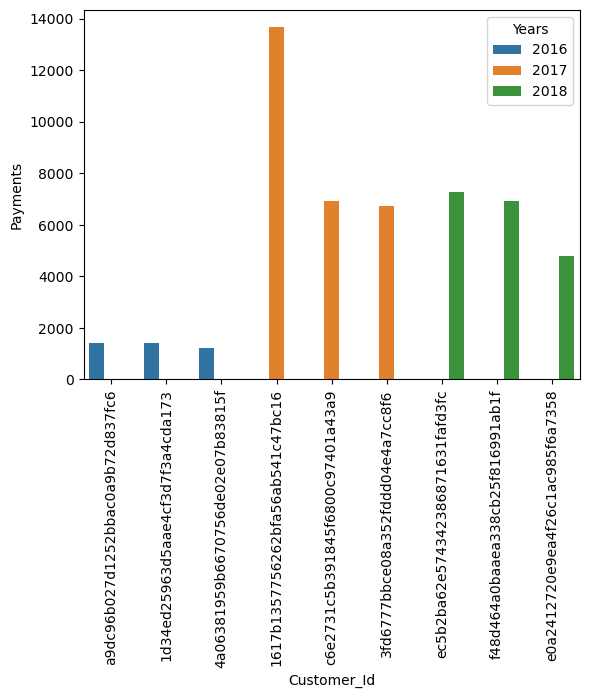

In [23]:
sns.barplot(x='Customer_Id', y='Payments', data=df, hue='Years')
plt.xticks(rotation = 90)
plt.show()
